# Zach's Notebook Walktrhough
https://nbviewer.jupyter.org/urls/zgul.de/hypothesis-testing.ipynb

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

### Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false
    - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.10


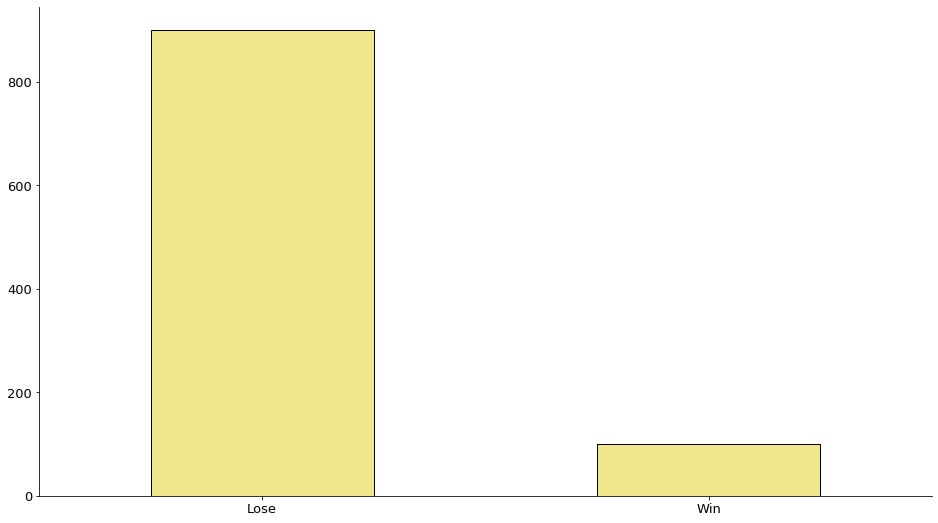

In [38]:
#creating the odds to be one golden ducky per ten golden duckies
tickets = pd.Series([True] * 100 + [False] * 900)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar(color='khaki')
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

- Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory
    - We we take a random sample and calculate the win rate, we won't expect to see exactly 10% even though we know that is what the overall rate is.

- Examples of biased samples:

    - non-response: people that don't respond are a diff population
    - undercoverage: some groups aren't well represented
    - voluntary: people volunteer for surveys
    - leading questions
    - social desirability

- Implementation: Use the .sample method on our series to randomly choose 20 tickets, representing 20 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [50]:
#random sample with win rate of %10
n = 20
tickets.sample(n).mean()

0.25

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 10% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 10 to get a sample and calculate the winrate 10 times. Each of the 10 numbers produced represents the calculated winrate for one classroom of 20 students.

In [57]:
[tickets.sample(n).mean() for _ in range(10)]

[0.1, 0.05, 0.05, 0.1, 0.15, 0.05, 0.15, 0.05, 0.15, 0.15]

- Theory: The winrates we see aren't ever exactly 10%, but we would expect the rate to be closer to 10% than further away. That is, it is more likely that a classroom will come up with a win rate of 9% than a winrate of 20%.

    - If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

    - That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 20 students. That is, we will simulate 10,000 classrooms of 20 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

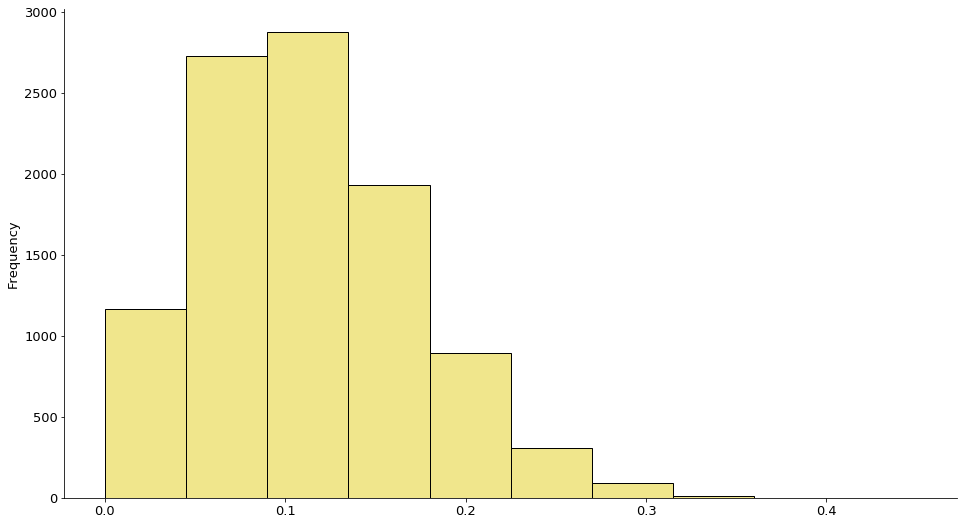

In [110]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=10,color='khaki')

- Theory: The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 20.

- The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is pqn‾‾‾√ (for our example), aka the standard error

In [69]:
se = math.sqrt((.10 * .90) / n)
print(se)

0.0670820393249937


Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [70]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0671
sample_means.std(): 0.0664


- That the sampling distribution being normally distributed is very powerful and has important implications:

    - confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
    - One classroom calculates their winrate at 7% and claims the tickets were distributed unfairly. What is the likelihood we observe a 7% (or smaller) winrate just due to chance?

In [72]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.07)

0.315547532357701

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

### Null and Alternative Hypothesis
- H0: status quo: no difference or no effect
- Ha: alternative: there is a difference or effect
- whether Ha is ≠, <, >, determines one-tailed vs two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed

### Mini Exercise -- CLT
- Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
- Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
- Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [77]:
#theoretically, each dice number has equal chance to be rolled, we take the average of that
theory_prob = (6 + 5 + 4 + 3 + 2 + 1)/6

3.5


In [97]:
rolls = np.random.choice([1,2,3,4,5,6],size = 6 * 10_000).reshape(10_000, 6)
rolls_df = pd.DataFrame(rolls)
rolls_df['average_rolls'] = rolls_df.mean(axis=1)

,0,1,2,3,4,5,average_rolls
0,3,6,5,1,5,3,3.833333
1,6,5,6,6,1,2,4.333333
2,4,5,6,2,3,4,4.000000
3,2,3,6,6,3,1,3.500000
4,6,2,4,3,4,3,3.666667
...,...,...,...,...,...,...,...
9995,4,6,2,2,1,3,3.000000
9996,6,6,5,2,4,6,4.833333
9997,1,4,6,3,5,6,4.166667
9998,4,4,6,1,5,4,4.000000


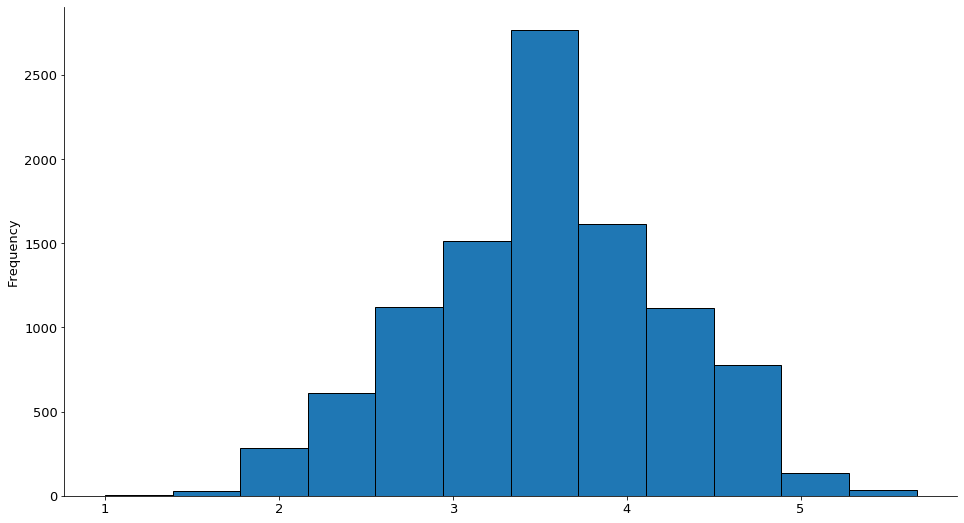

In [106]:
y = rolls_df['average_rolls']

y.plot.hist(bins=12)

# A Uniform Distribution
The average is as expected with our theoretical average

# Overview Exercises
### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?
Has the speed of internet slowed down after changing internet service providers?

##### null hypothesis
There is no difference in network speed since changing internet service providers.

##### alternative hypothesis
The network speed has slowed down since changing internet service providers.

##### true positive
Since p is 0 within 10 decimal places, we can safely reject the null hypothesis of no linear correlation. Less formally, it seems as though the speed of network and internet service provider are very related.

##### true negative
With such a high p-value, we fail to reject the null hypothesis. Less formally, it seems as though two groups are independent of each other and the speed of network has not changed with different internet service providers.

##### type I error
We reject the null hypothesis with testing and decide to switch internet providers. In actuality, the internet provider did not affect the speed of internet, and it stays the same after switching.

##### type II error
We accept the null hypothesis and stay with the same internet provider. However, the provider was causing a slower network speed, and it continues to affect the internet latency.

### Is the website redesign any good?
Do less customers use our website after redesigning?

##### null hypothesis
There is no change in rate of customers using the website.

##### alternative hypothesis
Less customers have been using the website after the redesign.

##### true positive
Since p is 0 within 10 decimal places, we can safely reject the null hypothesis of no linear correlation. Less formally, it seems as though the web redesign has cause less customers to visit the website.

##### true negative
With such a high p-value, we fail to reject the null hypothesis. Less formally, it seems as though two groups are independent of each other and the redesigned website has not changed the rate of customers visting the site.

##### type I error
We reject the null hypothesis with testing and decide to redesign the website again. In actuality, the original redesign did not affect the rate of customers visiting the site, and we spent money on redesigning for nothing. 
:/

##### type II error
We accept the null hypothesis and do not change the website again. However, the redesign is continuing to cause customers to use our site less.

### Is our television ad driving more sales?
Do we have an increase in sales after broadcasting our television ad?

##### null hypothesis
We have the same amount of sales after broadcasting out television ad.

##### alternative hypothesis
Our amount of sales have changed after broadcasting our television ad.

##### true positive
Since p is 0 within 10 decimal places, we can safely reject the null hypothesis of no linear correlation. Less formally, we have an increase (or decrease if controversial! o.o) of sales after broadcasting our television ad.

##### true negative
With such a high p-value, we fail to reject the null hypothesis. Less formally, the television advertisment did not cause a change in rate of sales.

##### type I error
We reject the null hypothesis with testing and decide to keep playing the ad. In actuality, we do not have an increase of sales and lose money. :?

##### type II error
We accept the null hypothesis and stop playing the television ad. However, the advertisment did cause an increase in sales and now we no longer have an increase.

# T-Test Exercises

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Comparing both offices to see if less than or higher than each other
- We will use two tail T-test

In [ ]:
x1 = df[df.study_strategy == 'flashcards'].exam_score
x2 = df[df.study_strategy != 'flashcards'].exam_score

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

In [61]:
from math import sqrt
from scipy import stats

office_1 = np.random.normal(90, 15, size = 10_000)
office_2 = np.random.normal(100,20, size = 10_000)

xbar1 = office_1.mean()
xbar2 = office_2.mean()

n1 = office_1.shape[0]
n2 = office_2.shape[0]

s1 = office_1.std()
s2 = office_2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = -41.19856
p = 2.00000


### Load the mpg dataset and use it to answer the following questions:

In [75]:
from pydataset import data
mpg = data('mpg')
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


##### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
# Null Hypothesis = there is no difference between mpg of cars from 2008 and 1999

In [ ]:
# Alternate Hypothesis, one year has better average mpg than the other year

In [121]:
fe_2008 = mpg[mpg.year == 2008].avg_mpg
fe_1999 = mpg[mpg.year == 1999].avg_mpg

xbar1 = fe_2008.mean()
xbar2 = fe_1999.mean()

n1 = fe_2008.shape[0]
n2 = fe_1999.shape[0]

s1 = fe_2008.std()
s2 = fe_1999.std()

degf = n1 + n2 - 2

s_p = sqrt((((n1 - 1) * (s1**2)) + ((n2 - 1) * (s2**2))) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt((s1**2 / n1) + (s2**2 / n2))

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))

p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = -0.21960
p = 1.17363


##### Are compact cars more fuel-efficient than the average car?

In [ ]:
# Null Hypothesis = there is no difference between mpg of compact cars to all cars

In [ ]:
# Alternative hypothesis = compact cars are more fuel efficient

In [122]:
compact_cars = mpg[mpg['class'] == 'compact']

μ = mpg.avg_mpg.mean()
xbar = compact_cars.avg_mpg.mean()

s = compact_cars.avg_mpg.std()
n = compact_cars.shape[0]

degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t)
print(p)

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

2.0992818971585668e-10
t = 7.897
p = 0.000


In [ ]:
#p is 0 after rounding, we reject the null hypothesis

##### Do manual cars get better gas mileage than automatic cars?

In [ ]:
# Null Hypothesis = there is no difference between mpg of manual cars to automatics cars

In [ ]:
# Alternateive Hypothesis = manual cars get better gas mileage than automatic cars

In [119]:
auto = mpg[mpg.trans.str.count('auto') > 0].avg_mpg
trans = mpg[mpg.trans.str.count('man') > 0].avg_mpg

xbar1 = auto.mean()
xbar2 = trans.mean()

n1 = auto.shape[0]
n2 = trans.shape[0]

s1 = auto.std()
s2 = trans.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))

p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = -4.59344
p = 1.99999


# Correlation Exercises
Use the telco_churn data. 

In [172]:
df = pd.read_csv ('Cust_Churn_Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Does tenure correlate with monthly charges? Total charges?

In [155]:
# tenure vs. MonthlyCharges
# null hypothesis: Tenure does not affect the monthly charge
# alternate hypothesis: Tenure causes an increase or decrease in monthly charges

n = df.shape[0]         # number of observations
degf = n - 2            # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95     # desired confidence interval
α = 1 - conf_interval

print("Our alpha value is:",round(α,2))

x = df.tenure
y = df.MonthlyCharges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print("The correlation coefficient (r) =",round(r_xy,4))

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
print("The t-statistic is:",round(t,4))

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
print("The p-value is:",p)

print("\nIs p less than alpha?:",p < α)
print("""Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and monthly charges.""")

Our alpha value is: 0.05
The correlation coefficient (r) = 0.2479
The t-statistic is: 21.4717
The p-value is: 4.0940449914965545e-99

Is p less than alpha?: True
Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and monthly charges.


In [173]:
#the easy way
corr, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
corr, p

(0.24789985628615005, 4.0940449915016345e-99)

In [157]:
# tenure vs. TotalCharges
# null hypothesis: Tenure does not affect the total charge
# alternate hypothesis: Tenure causes an increase or decrease in total charges

n = df.shape[0]         # number of observations
degf = n - 2            # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95     # desired confidence interval
α = 1 - conf_interval

print("Our alpha value is:",round(α,2))

x = df.tenure
y = df.TotalCharges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print("The correlation coefficient (r) =",round(r_xy,4))

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
print("The t-statistic is:",round(t,4))

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
print("The p-value is:",p)

print("\nIs p less than alpha?:",p < α)
print("""Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and total charges.""")

Our alpha value is: 0.05
The correlation coefficient (r) = 0.8248
The t-statistic is: 122.3829
The p-value is: 0.0

Is p less than alpha?: True
Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and total charges.


In [184]:
#must convert Nans to Zero
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [185]:
#the easy way
corr, p = stats.pearsonr(df.tenure, df.TotalCharges)
corr, p

(0.826178397950242, 0.0)

- What happens if you control for phone and internet service?

In [188]:
df_pi = df[(df.InternetService != 'No')&(df.PhoneService == 'Yes')]
# tenure vs. MonthlyCharges for phone and internet service customers only
# null hypothesis: Tenure does not affect the monthly charge
# alternate hypothesis: Tenure causes an increase or decrease in monthly charges

n = df_pi.shape[0]         # number of observations
degf = n - 2            # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95     # desired confidence interval
α = 1 - conf_interval

print("Our alpha value is:",round(α,2))

x = df_pi.tenure
y = df_pi.MonthlyCharges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print("The correlation coefficient (r) =",round(r_xy,4))

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
print("The t-statistic is:",round(t,4))

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
print("The p-value is:",p)

print("\nIs p less than alpha?:",p < α)
print("""Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and monthly charges
            for phone + internet service customers.""")

Our alpha value is: 0.05
The correlation coefficient (r) = 0.4431
The t-statistic is: 34.363
The p-value is: 1.0146095231017521e-231

Is p less than alpha?: True
Since p is less than alpha,
            we REJECT our null hypothesis that
            there is no linear correlation between the
            length of tenure and monthly charges
            for phone + internet service customers.


In [186]:
#must convert Nans to Zero
df_pi['TotalCharges'] = df_pi['TotalCharges'].fillna(0)

In [187]:
#the easy way
corr, p = stats.pearsonr(df_pi.tenure, df_pi.TotalCharges)
corr, p

(0.9579592038044629, 0.0)

### Use the employees database.

In [189]:
#defines function to create a sql url using personal credentials
def get_db_url(db_name):
    
    #importing variables used to connect to sql database
    from env import host, username, password
    
    #creates the url and the function returns it
    url = f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
    return (url)

employees = pd.read_sql('SELECT * FROM employees',get_db_url('employees'))
salaries = pd.read_sql('SELECT * FROM salaries',get_db_url('employees'))

In [196]:
from datetime import date
cur_salaries = salaries[salaries.to_date > date.today()]

,emp_no,salary,from_date,to_date
16,10001,88958,2002-06-22,9999-01-01
22,10002,72527,2001-08-02,9999-01-01
29,10003,43311,2001-12-01,9999-01-01
45,10004,74057,2001-11-27,9999-01-01
58,10005,94692,2001-09-09,9999-01-01


In [215]:
cur_employees = pd.read_sql('''SELECT e.emp_no, e.hire_date, t.to_date, s.salary
                        FROM employees as e
                        JOIN titles as t ON e.emp_no = t.emp_no AND t.to_date > CURDATE()
                        JOIN salaries as s ON e.emp_no = s.emp_no AND s.to_date > CURDATE();
                                ''',get_db_url('employees'))

- Is there a relationship between how long an employee has been with the company and their salary?

In [217]:
def calc_loyalty(df):    
    from datetime import date
    f_date = df.hire_date
    l_date = date.today()
    delta = l_date - f_date
    return round((delta.days/365),2)

cur_employees['loyalty'] = cur_employees.apply(calc_loyalty, axis=1)
cur_employees.head()

,emp_no,hire_date,to_date,salary,loyalty
0,10001,1986-06-26,9999-01-01,88958,34.22
1,10002,1985-11-21,9999-01-01,72527,34.81
2,10003,1986-08-28,9999-01-01,43311,34.04
3,10004,1986-12-01,9999-01-01,74057,33.78
4,10005,1989-09-12,9999-01-01,94692,31.00


In [223]:
#the easy way
# null hypothesis: there is no correlation between an employees salary and how many years
# the employees has worked there for
corr, p = stats.pearsonr(cur_employees.loyalty, cur_employees.salary)
print("corr:",corr, "\np-value:",p)
print("P is low, we reject the null hypothesis!")
print("There is a correlation between salary and loyalty with the company.")

corr: 0.3064632442655585 
p-value: 0.0
P is low, we reject the null hypothesis!
There is a correlation between salary and loyalty with the company.


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [233]:
title_counts = pd.read_sql('''SELECT employees.emp_no, COUNT(title) as titles
                            FROM employees
                            JOIN titles as t ON t.emp_no = employees.emp_no
                            GROUP BY employees.emp_no;
                            ''',get_db_url('employees'))

In [234]:
emp_title_count = cur_employees.merge(title_counts, left_on='emp_no', right_on='emp_no')
emp_title_count.head()

,emp_no,hire_date,to_date,salary,loyalty,titles
0,10001,1986-06-26,9999-01-01,88958,34.22,1
1,10002,1985-11-21,9999-01-01,72527,34.81,1
2,10003,1986-08-28,9999-01-01,43311,34.04,1
3,10004,1986-12-01,9999-01-01,74057,33.78,2
4,10005,1989-09-12,9999-01-01,94692,31.00,2


In [237]:
corr, p = stats.pearsonr(emp_title_count.titles, emp_title_count.loyalty)
print("corr:",corr, "\np-value:",p)
print("P is low, we reject the null hypothesis!")
print("There is a correlation between title changes and loyalty with the company.")

corr: 0.28712735047793164 
p-value: 0.0
P is low, we reject the null hypothesis!
There is a correlation between title changes and loyalty with the company.


- Use the sleepstudy data. Is there a relationship between days and reaction time?

In [239]:
from pydataset import data
sleep_df = data('sleepstudy')
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [242]:
corr, p = stats.pearsonr(sleep_df.Days, sleep_df.Reaction)
print("corr:",corr, "\np-value:",p)
print("P is low, we reject the null hypothesis!")
print("There is a correlation between days and reaction time.")

corr: 0.5352302262650253 
p-value: 9.894096322214812e-15
P is low, we reject the null hypothesis!
There is a correlation between days and reaction time.


# Chi Squared Exercises

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                Codeup Student	Not Codeup Student
- Uses a Macbook----------49------------20
- Doesn't Use A Macbook--1-------------30

In [266]:
index = ['Uses_Mac', 'Not_uses_Mac']
columns = ['Codeup_student', 'Not_Codeup_Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)

In [267]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


- Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [263]:
# manufacturer vs. avg_mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


#### Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [ ]:
# Null hypothesis: both genders are equally likely to work in sales or marketing
# Alternative hypothesis: one gender is more likely to work in the sales or marketing department

In [272]:
cur_employees = pd.read_sql('''SELECT d.dept_name, e.gender, COUNT(e.emp_no) as total_employees
                            FROM employees as e
                            JOIN dept_emp as de ON de.emp_no = e.emp_no AND de.to_date > CURDATE()
                            JOIN departments as d ON d.dept_no = de.dept_no
                            WHERE dept_name = 'Sales' or dept_name = 'Marketing'
                            GROUP BY d.dept_name, e.gender;
                                ''',get_db_url('employees'))

In [273]:
cur_employees

,dept_name,gender,total_employees
0,Marketing,M,8978
1,Marketing,F,5864
2,Sales,M,22702
3,Sales,F,14999


In [274]:
index = ['Sales','Marketing']
columns = ['M','F']
observed = pd.DataFrame([[22702, 14999], [8978, 5864]], index=index, columns=columns)
observed

,M,F
Sales,22702,14999
Marketing,8978,5864


In [275]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[22702 14999]
 [ 8978  5864]]
---
Expected

[[22731.2426013 14969.7573987]
 [ 8948.7573987  5893.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


- Is an employee's gender independent of whether or not they are or have been a manager?